## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.25, 0.35]
NEURONS = [[512, 256, 128], [128, 256, 512, 1024]]

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drp_ratio in Dropout_EXP:
    for neurons in NEURONS:
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=neurons, drp_ratio=drp_ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        exp_name_tag = "exp-ly%s-dp%s" % (str(len(neurons)),str(drp_ratio))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

Epoch 50/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.0991 - acc: 0.6082 - val_loss: 1.2735 - val_acc: 0.5496
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               33024     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               131584    
____

50000/50000 [==============================] - 2s 34us/step - loss: 1.2513 - acc: 0.5537 - val_loss: 1.3529 - val_acc: 0.5126
Epoch 48/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.2441 - acc: 0.5568 - val_loss: 1.3458 - val_acc: 0.5189
Epoch 49/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.2387 - acc: 0.5581 - val_loss: 1.3482 - val_acc: 0.5172
Epoch 50/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.2355 - acc: 0.5569 - val_loss: 1.3298 - val_acc: 0.5231
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0        

50000/50000 [==============================] - 2s 34us/step - loss: 1.3122 - acc: 0.5332 - val_loss: 1.3179 - val_acc: 0.5289
Epoch 47/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.3090 - acc: 0.5333 - val_loss: 1.3188 - val_acc: 0.5279
Epoch 48/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.2956 - acc: 0.5384 - val_loss: 1.3303 - val_acc: 0.5224
Epoch 49/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.2942 - acc: 0.5369 - val_loss: 1.3128 - val_acc: 0.5308
Epoch 50/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.2865 - acc: 0.5412 - val_loss: 1.3239 - val_acc: 0.5260
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393

50000/50000 [==============================] - 2s 35us/step - loss: 1.4342 - acc: 0.4856 - val_loss: 1.3921 - val_acc: 0.5048
Epoch 44/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.4244 - acc: 0.4878 - val_loss: 1.3828 - val_acc: 0.5067
Epoch 45/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.4246 - acc: 0.4893 - val_loss: 1.3871 - val_acc: 0.5001
Epoch 46/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.4225 - acc: 0.4894 - val_loss: 1.3913 - val_acc: 0.5035
Epoch 47/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.4161 - acc: 0.4902 - val_loss: 1.3894 - val_acc: 0.4984
Epoch 48/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.4154 - acc: 0.4884 - val_loss: 1.3773 - val_acc: 0.5062
Epoch 49/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.4060 - acc: 0.4950 - val_loss: 1.3686 - val_acc: 0.5090
Epoch 50/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 34us/step - loss: 1.4472 - acc: 0.4842 - val_loss: 1.3967 - val_acc: 0.4957
Epoch 43/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.4438 - acc: 0.4845 - val_loss: 1.3817 - val_acc: 0.5083
Epoch 44/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.4349 - acc: 0.4835 - val_loss: 1.3719 - val_acc: 0.5111
Epoch 45/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.4259 - acc: 0.4911 - val_loss: 1.3711 - val_acc: 0.5040
Epoch 46/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.4301 - acc: 0.4895 - val_loss: 1.3686 - val_acc: 0.5089
Epoch 47/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.4179 - acc: 0.4914 - val_loss: 1.3740 - val_acc: 0.5036
Epoch 48/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.4100 - acc: 0.4945 - val_loss: 1.3609 - val_acc: 0.5085
Epoch 49/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 34us/step - loss: 1.5600 - acc: 0.4374 - val_loss: 1.4657 - val_acc: 0.4711
Epoch 40/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.5560 - acc: 0.4382 - val_loss: 1.4739 - val_acc: 0.4692
Epoch 41/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.5501 - acc: 0.4415 - val_loss: 1.4547 - val_acc: 0.4799
Epoch 42/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.5468 - acc: 0.4420 - val_loss: 1.4645 - val_acc: 0.4698
Epoch 43/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.5395 - acc: 0.4441 - val_loss: 1.4659 - val_acc: 0.4687
Epoch 44/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.5410 - acc: 0.4434 - val_loss: 1.4538 - val_acc: 0.4764
Epoch 45/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.5312 - acc: 0.4481 - val_loss: 1.4427 - val_acc: 0.4845
Epoch 46/50
50000/50000 [=====================

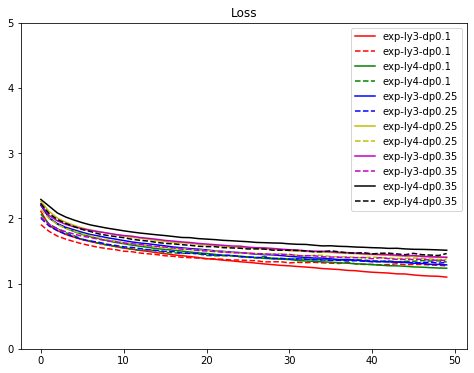

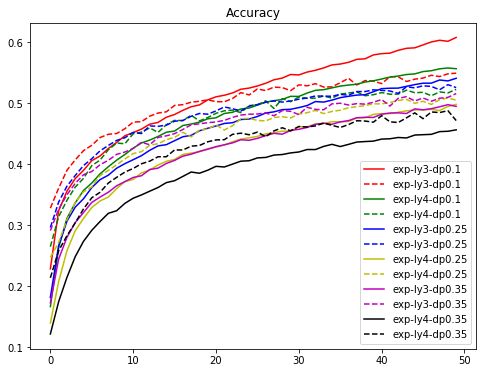

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()